In [1]:
import pandas as pd

csv = 'driving_log.csv'
data = pd.read_csv(csv)

In [2]:
len(data)

8036

In [3]:
data.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


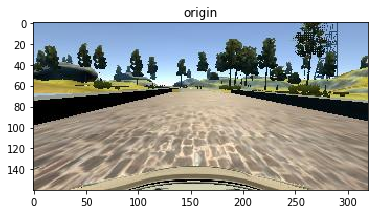

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread(data['center'][0].strip())
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('origin')

# [imgaug](https://github.com/aleju/imgaug)

1. arithmetic
    1. Add
    2. Multiply
    3. Dropout
    4. AdditiveGaussianNoise
2. blur
    1. GaussianBlur
    2. AverageBlur
    3. MedianBlur
    4. MotionBlur
3. convolutional
    1. Sharpen
    2. Emboss
    3. EdgeDetect
    4. DirectedEdgeDetect
4. weather
    1. FastSnowyLandscape
    2. Clouds
    3. Fog
    4. Snowflakes

In [5]:
import imgaug as ia
from imgaug import augmenters as iaa

ia.seed(1)

## arithmetic

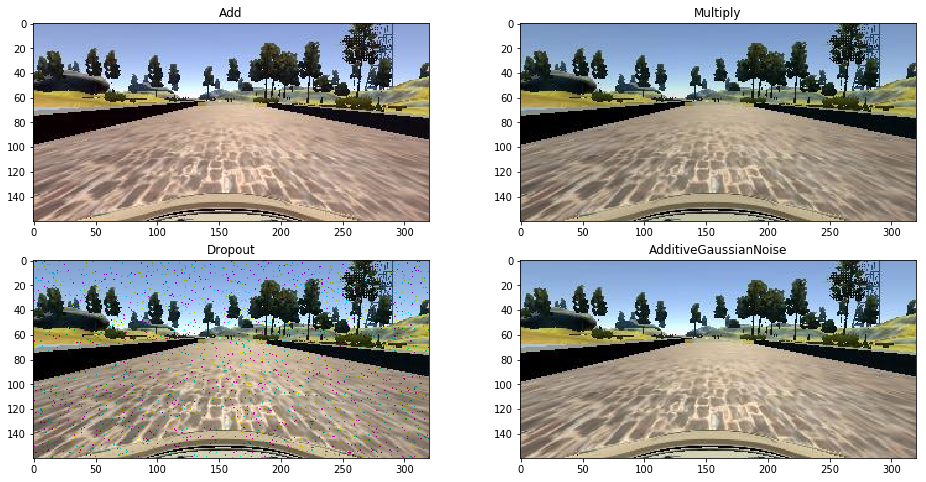

In [6]:
ia.seed(1)

plt.figure(figsize=(16, 8))

sequence = iaa.Sequential([iaa.Add((-10, 10), per_channel=0.5)])
aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 1)
plt.imshow(aug_img)
plt.title('Add')

sequence = iaa.Sequential([iaa.Multiply((0.9, 1.1), per_channel=0.5)])
aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 2)
plt.imshow(aug_img)
plt.title('Multiply')

sequence = iaa.Sequential([iaa.Dropout((0.0, 0.1), per_channel=0.5)])
aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 3)
plt.imshow(aug_img)
plt.title('Dropout')

sequence = iaa.Sequential([iaa.AdditiveGaussianNoise(
    loc=0, scale=(0.0, 0.05*255), per_channel=0.5)])
aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 4)
plt.imshow(aug_img)
plt.title('AdditiveGaussianNoise')

## blur

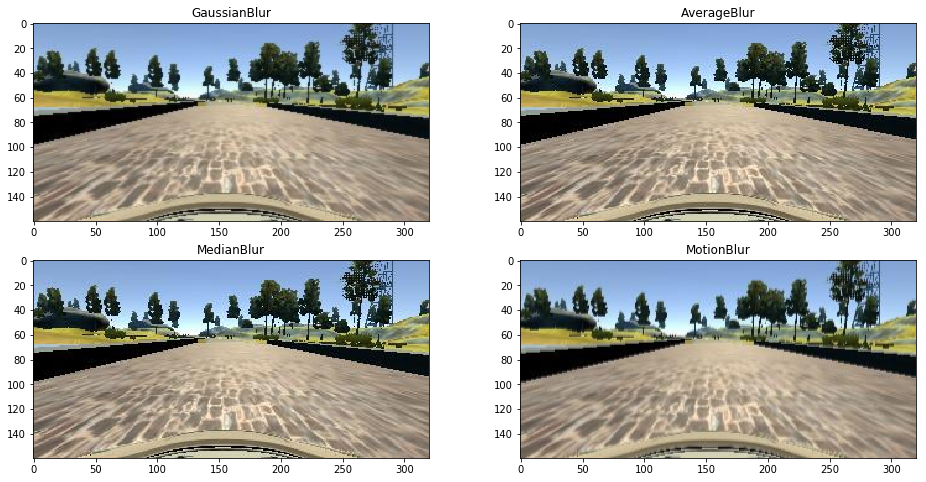

In [7]:
ia.seed(1)

plt.figure(figsize=(16, 8))

sequence = iaa.Sequential([iaa.GaussianBlur((0.5, 0.5))])
aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 1)
plt.imshow(aug_img)
plt.title('GaussianBlur')

sequence = iaa.Sequential([iaa.AverageBlur(k=(1, 3))])
aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 2)
plt.imshow(aug_img)
plt.title('AverageBlur')

sequence = iaa.Sequential([iaa.MedianBlur(k=(1, 3))])
aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 3)
plt.imshow(aug_img)
plt.title('MedianBlur')

sequence = iaa.Sequential([iaa.MotionBlur(3, 5)])
plt.subplot(2, 2, 4)
aug_img = sequence.augment_image(image)
plt.imshow(aug_img)
plt.title('MotionBlur')

## convolutional

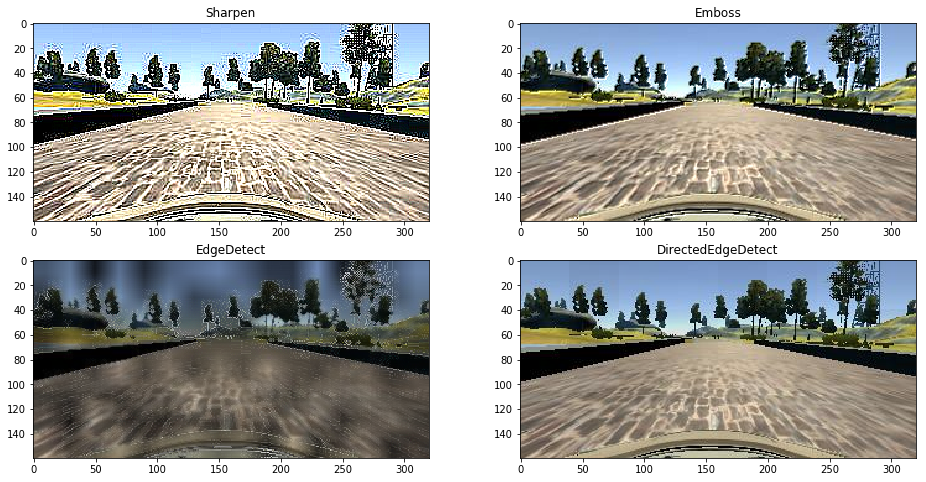

In [8]:
ia.seed(1)

plt.figure(figsize=(16, 8))

sequence = iaa.Sequential(
    [iaa.Sharpen(alpha=(0.0, 1.0), lightness=(0.75, 1.5))])
aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 1)
plt.imshow(aug_img)
plt.title('Sharpen')

sequence = iaa.Sequential([iaa.Emboss(alpha=(0.0, 1.0), strength=(0.0, 2.0))])
aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 2)
plt.imshow(aug_img)
plt.title('Emboss')

sequence = iaa.Sequential([iaa.SimplexNoiseAlpha(
    iaa.EdgeDetect(alpha=(0.0, 1.0)))])
aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 3)
plt.imshow(aug_img)
plt.title('EdgeDetect')

sequence = iaa.Sequential([iaa.SimplexNoiseAlpha(
    iaa.DirectedEdgeDetect(alpha=(0.0, 1.0), direction=(0.0, 1.0)))])
aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 4)
plt.imshow(aug_img)
plt.title('DirectedEdgeDetect')

## weather

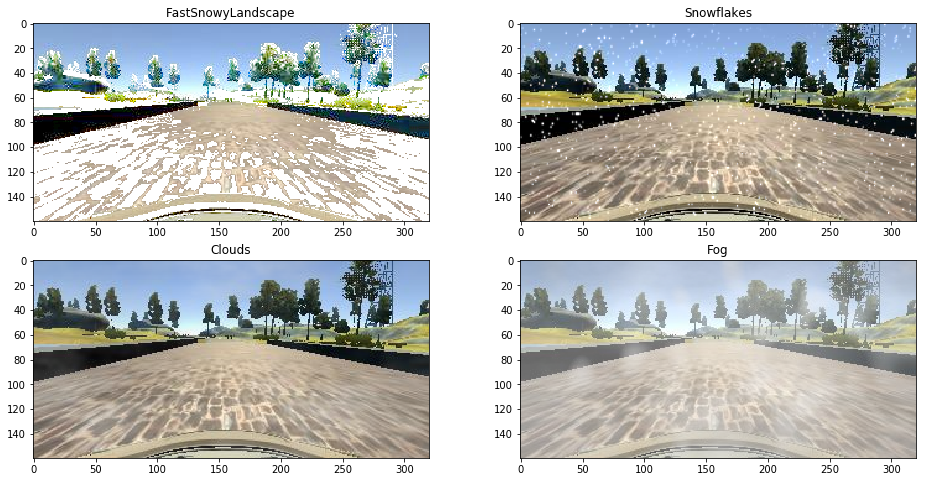

In [9]:
ia.seed(1)

plt.figure(figsize=(16, 8))

sequence = iaa.Sequential(
    [iaa.FastSnowyLandscape(lightness_threshold=(150, 175))])
aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 1)
plt.imshow(aug_img)
plt.title('FastSnowyLandscape')

sequence = iaa.Sequential([iaa.Snowflakes(density=(0.005, 0.075))])
aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 2)
plt.imshow(aug_img)
plt.title('Snowflakes')

sequence = iaa.Sequential([iaa.SimplexNoiseAlpha(iaa.Clouds())])
aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 3)
plt.imshow(aug_img)
plt.title('Clouds')

sequence = iaa.Sequential([iaa.SimplexNoiseAlpha(iaa.Fog())])
aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 4)
plt.imshow(aug_img)
plt.title('Fog')

## pipeline

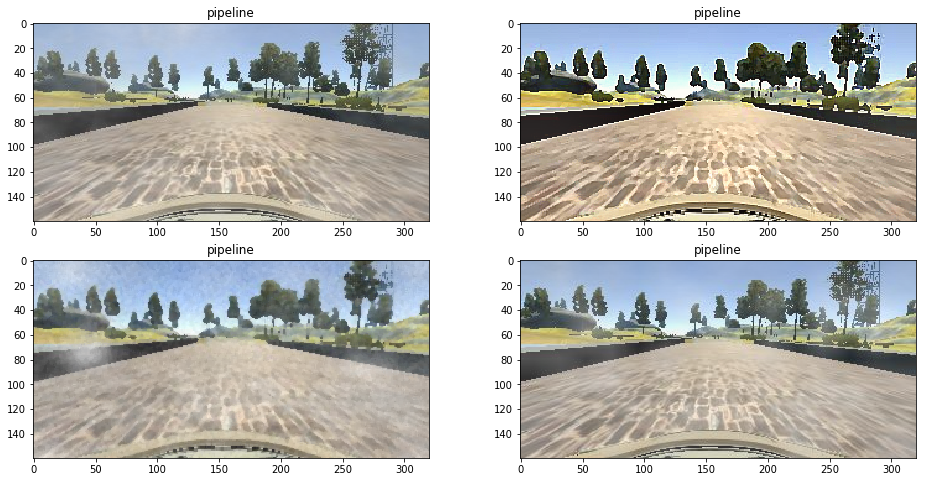

In [10]:
import imgaug as ia
from imgaug import augmenters as iaa

ia.seed(1)


def sometime(aug): return iaa.Sometimes(0.5, aug)


sequence = iaa.Sequential([
    # arithmetic
    iaa.OneOf([
        sometime(iaa.Add((-10, 10), per_channel=0.5)),
        sometime(iaa.Multiply((0.9, 1.1), per_channel=0.5)),
        sometime(iaa.Dropout((0.0, 0.1), per_channel=0.5)),
        sometime(iaa.AdditiveGaussianNoise(
            loc=0, scale=(0.0, 0.05*255), per_channel=0.5)),
    ]),
    # blur
    iaa.OneOf([
        sometime(iaa.GaussianBlur((0, 1.0))),
        sometime(iaa.AverageBlur(k=(1, 3))),
        sometime(iaa.MedianBlur(k=(1, 3))),
        sometime(iaa.MotionBlur(3, 5)),
    ]),
    # convolutional
    iaa.OneOf([
        sometime(iaa.Sharpen(alpha=(0.0, 1.0), lightness=(0.75, 1.5))),
        sometime(iaa.Emboss(alpha=(0.0, 1.0), strength=(0.0, 2.0))),
        sometime(iaa.SimplexNoiseAlpha(
            iaa.EdgeDetect(alpha=(0.0, 1.0)))),
        sometime(iaa.SimplexNoiseAlpha(
            iaa.DirectedEdgeDetect(alpha=(0.0, 1.0), direction=(0.0, 1.0)))),
    ]),
    # weather
    iaa.OneOf([
        iaa.FastSnowyLandscape(lightness_threshold=(150, 175)),
        iaa.Snowflakes(density=(0.005, 0.075)),
        iaa.SimplexNoiseAlpha(iaa.Clouds()),
        iaa.SimplexNoiseAlpha(iaa.Fog()),
    ]),
],
    random_order=True
)

plt.figure(figsize=(16, 8))

aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 1)
plt.imshow(aug_img)
plt.title('pipeline')

aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 2)
plt.imshow(aug_img)
plt.title('pipeline')

aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 3)
plt.imshow(aug_img)
plt.title('pipeline')

aug_img = sequence.augment_image(image)
plt.subplot(2, 2, 4)
plt.imshow(aug_img)
plt.title('pipeline')